In [ ]:
install.packages('ggplot')
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


## Question 1 : Create a density plot for mpg from the mtcars dataset. Use appropriate labels for the x-axis and plot title.

In [ ]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


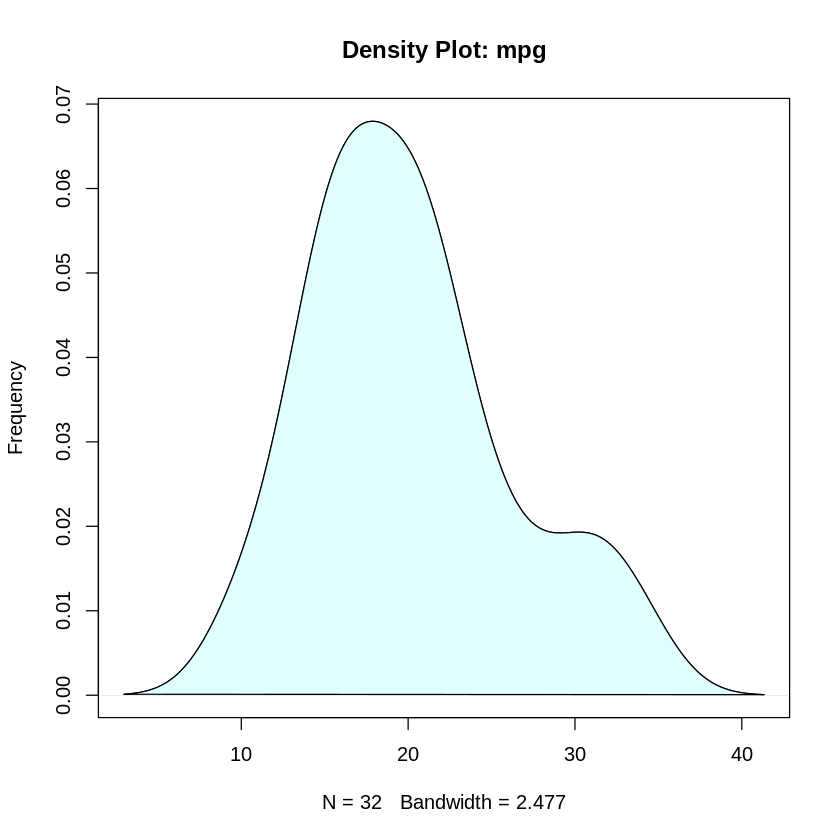

In [ ]:
plot(density(mtcars$mpg), main="Density Plot: mpg", ylab="Frequency")
polygon(density(mtcars$mpg), col="lightcyan1")

## Question 2 : Provide a summary statistics table for mpg cross-tabulated by gear from the mtcars dataset. Then, create a box plot for the same.

In [3]:
by(mtcars$mpg, mtcars$gear, summary)

mtcars$gear: 3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.40   14.50   15.50   16.11   18.40   21.50 
------------------------------------------------------------ 
mtcars$gear: 4
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.80   21.00   22.80   24.53   28.07   33.90 
------------------------------------------------------------ 
mtcars$gear: 5
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   15.80   19.70   21.38   26.00   30.40 

In [ ]:
cross.tab2 <- xtabs(mpg~gear, data=mtcars)
cross.tab2

gear
    3     4     5 
241.6 294.4 106.9 

In [ ]:
summary(cross.tab)

Call: xtabs(formula = ~mpg + gear, data = mtcars)
Number of cases in table: 32 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 54.67, df = 48, p-value = 0.2362
	Chi-squared approximation may be incorrect

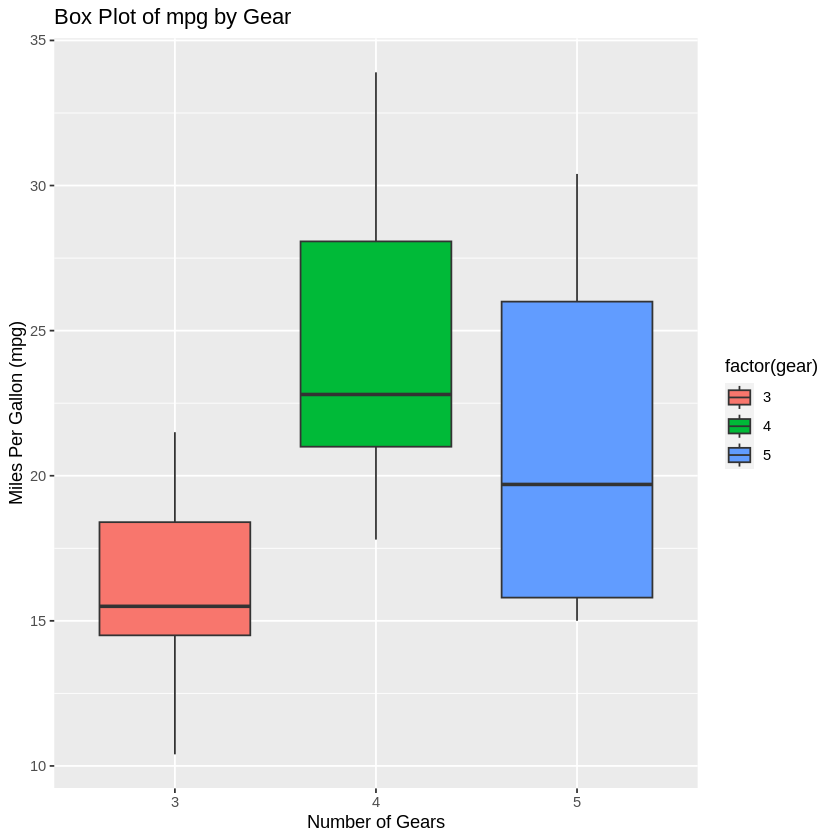

In [ ]:
ggplot(mtcars, aes(x = as.factor(gear), y = mpg, fill = factor(gear))) +
  geom_boxplot() +
  labs(title = "Box Plot of mpg by Gear", x = "Number of Gears", y = "Miles Per Gallon (mpg)")

## Question 3 : Run correlation tests on the data of the trees dataset and find out the correlation between the features of trees. You will be graded based on the different tests you perform.

In [ ]:
head(trees)

,Girth,Height,Volume
,<dbl>,<dbl>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


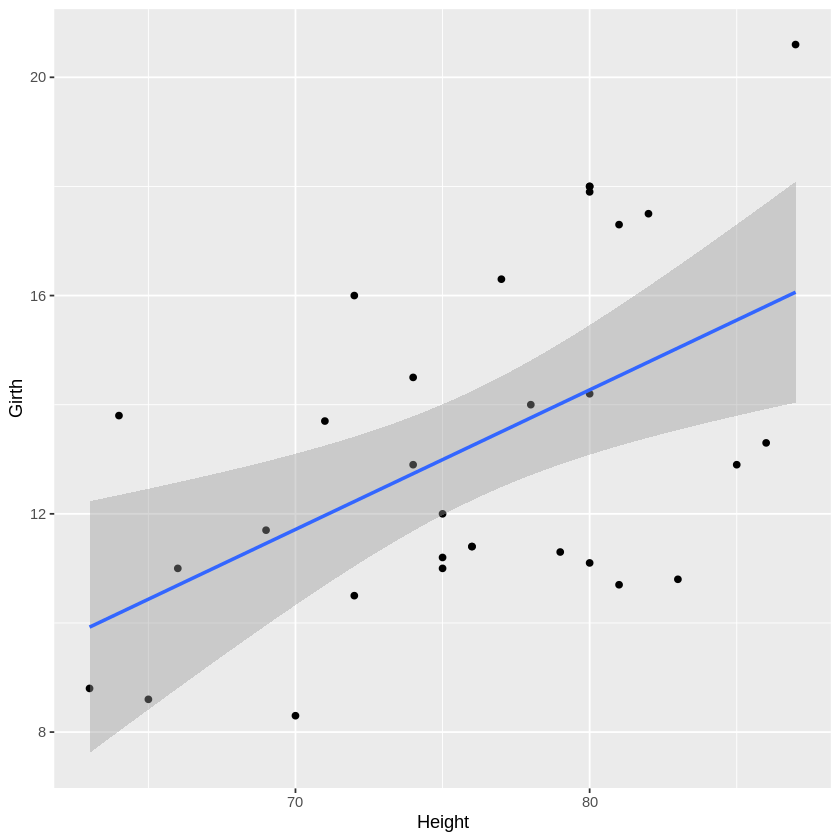

`geom_smooth()` using formula = 'y ~ x'


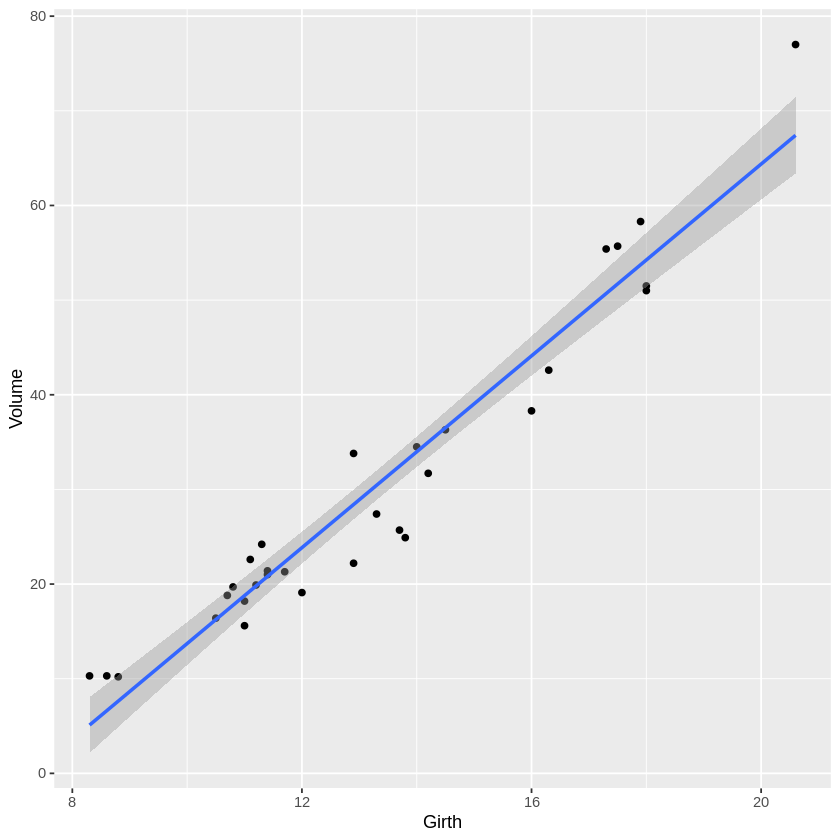

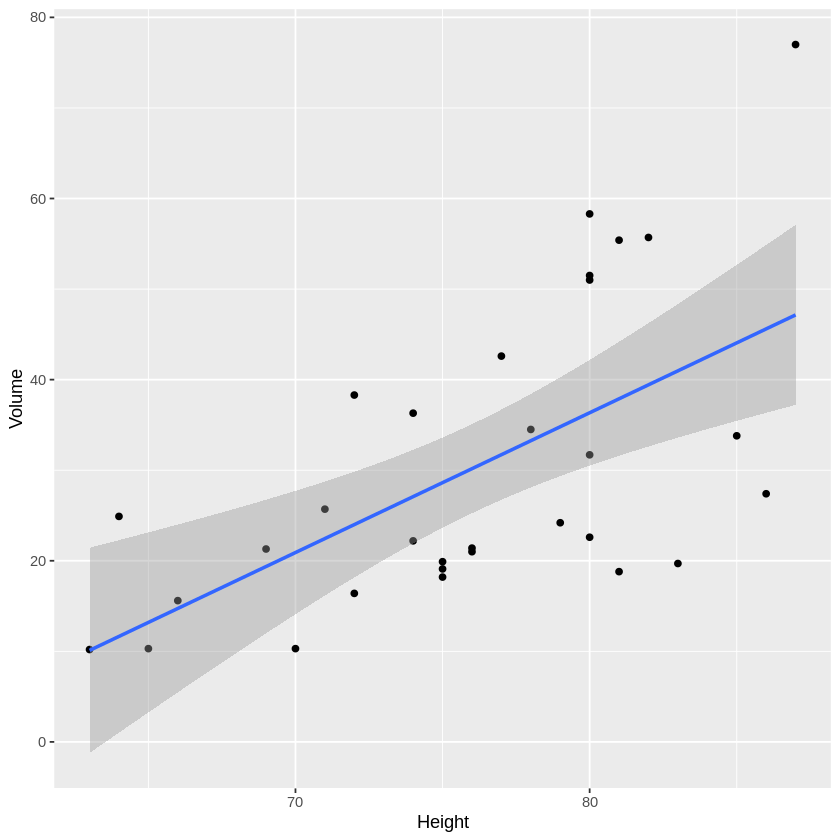

In [ ]:
# check for linearity
# girth v height
ggplot(trees, aes(x=Height, y=Girth)) + geom_point() + geom_smooth(method='lm')

# girth v volume
ggplot(trees, aes(x=Girth, y=Volume)) + geom_point() + geom_smooth(method='lm')

# height v volume
ggplot(trees, aes(x=Height, y=Volume)) + geom_point() + geom_smooth(method='lm')

In [ ]:
# check if variables have normal distribution
shapiro.test(trees$Girth) # normal
shapiro.test(trees$Height) # normal
shapiro.test(trees$Volume) # not normal


	Shapiro-Wilk normality test

data:  trees$Girth
W = 0.94117, p-value = 0.08893



	Shapiro-Wilk normality test

data:  trees$Height
W = 0.96545, p-value = 0.4034



	Shapiro-Wilk normality test

data:  trees$Volume
W = 0.88757, p-value = 0.003579


In [ ]:
# girth v height - since both are normal, run pearson
girth_height_cor <- cor(trees$Girth, trees$Height, method='pearson')
cat("Correlation between Girth and Height:", round(girth_height_cor,2))

# girth v volumn - since one is normal, other is not, run spearman
girth_volume_cor <- cor(trees$Girth, trees$Volume, method = "spearman")
cat("\nCorrelation between Girth and Volume:", round(girth_volume_cor,2))

# height v volume - since one is normal, other is not, run spearman
height_volume_cor <- cor(trees$Height, trees$Volume, method = "spearman")
cat("\nCorrelation between Height and Volume:", round(height_volume_cor,2))


Correlation between Girth and Height: 0.52
Correlation between Girth and Volume: 0.95
Correlation between Height and Volume: 0.58

## Question 4 : Give your hypothesis on which diet is better for gaining weight for the chicks in the ChickWeight dataset. To test the hypothesis, show the boxplots for all the diets

Ho : The mean weight between diet 1,2,3, and 4 are equal.

Ha : The mean weight of at least 1 of the four diets is different.

In [ ]:
head(ChickWeight)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
6,93,10,1,1


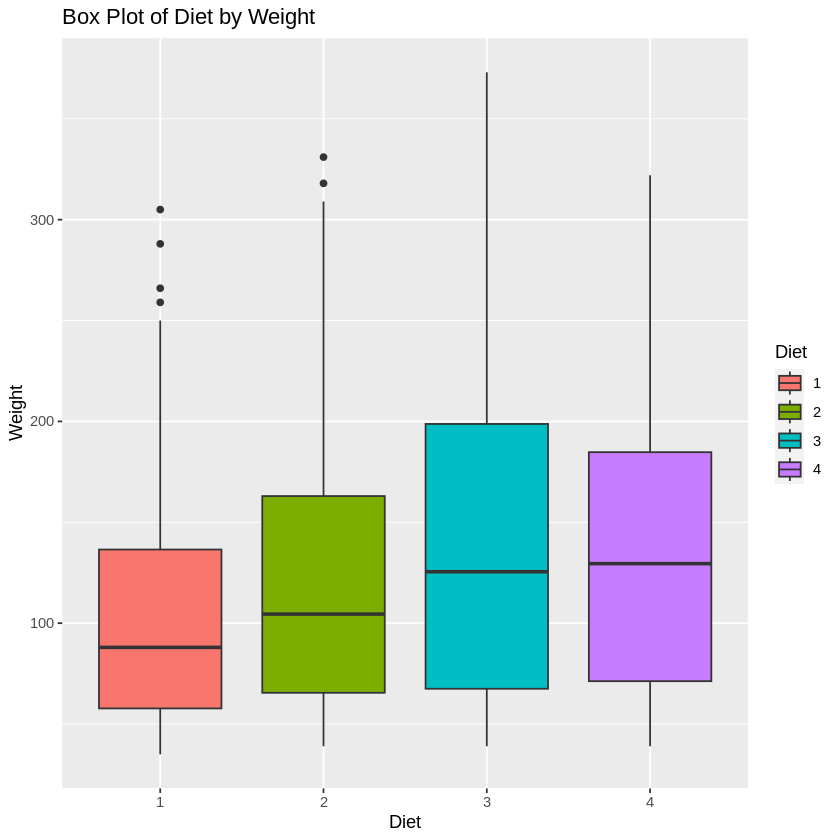

In [ ]:
ggplot(ChickWeight, aes(x = Diet, y = weight, fill = Diet)) +
  geom_boxplot() +
  labs(title = "Box Plot of Diet by Weight", x = "Diet", y = "Weight")

In [ ]:
shapiro.test(ChickWeight$weight) # not normal


	Shapiro-Wilk normality test

data:  ChickWeight$weight
W = 0.90866, p-value < 2.2e-16


In [ ]:
# run kruskal-wallis (nonparametric alternative of ANOVA)
kruskal.test(weight ~ Diet, data = ChickWeight)

# p-value is less than 0.05 (reject the null hypothesis)
# this suggests that one group is different from the others


	Kruskal-Wallis rank sum test

data:  weight by Diet
Kruskal-Wallis chi-squared = 24.45, df = 3, p-value = 2.012e-05


## Question 5 : Create a new column for the "iris" dataset, which includes the size of the species, i.e., the cumulative size of sepal and petal. Create a bar chart to plot the size for each of the species in the dataset.

In [ ]:
iris$Size <- iris$Sepal.Length + iris$Petal.Length
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Size
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,6.5
2,4.9,3.0,1.4,0.2,setosa,6.3
3,4.7,3.2,1.3,0.2,setosa,6.0
4,4.6,3.1,1.5,0.2,setosa,6.1
5,5.0,3.6,1.4,0.2,setosa,6.4
6,5.4,3.9,1.7,0.4,setosa,7.1


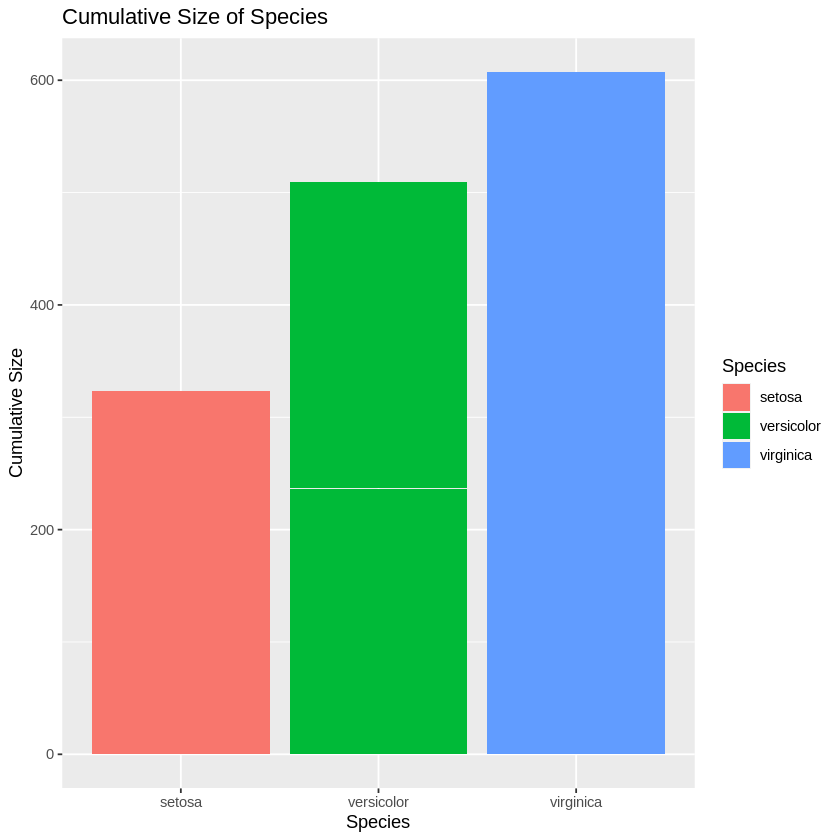

In [ ]:
ggplot(iris, aes(x = Species, y = Size, fill = Species)) +
  geom_bar(stat = "identity") +
  labs(title = "Cumulative Size of Species", x = "Species", y = "Cumulative Size")

## Question 6 : Calculate the correlation coefficients between the months of the different years from the AirPassengers dataset. Identify which months have the highest and lowest correlation.

In [ ]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [ ]:
# Convert time series to dataframe
months <- factor(cycle(AirPassengers), levels=1:12, labels=month.abb)
AirPassengers_df <- as.data.frame(tapply(AirPassengers, list(year=floor(time(AirPassengers)), month=months), c))
AirPassengers_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [ ]:
# finding correlation coefficients between months
AirPassengers_cor <- cor(AirPassengers_df)

# setting diagonal elements to NA so it doesn't interfere with max correlation calculations
for (i in 1:nrow(AirPassengers_cor)) {
  AirPassengers_cor[i, i] <- NA
}

AirPassengers_cor

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,NA,0.9982465,0.9932155,0.9959179,0.9968230,0.9987000,0.9977168,0.9974787,0.9963723,0.9979196,0.9956477,0.9918211
Feb,0.9982465,NA,0.9918130,0.9947516,0.9950393,0.9972964,0.9949910,0.9959544,0.9950109,0.9964015,0.9944752,0.9910534
Mar,0.9932155,0.9918130,NA,0.9915893,0.9947421,0.9949229,0.9918817,0.9948521,0.9949687,0.9923116,0.9943344,0.9906346
Apr,0.9959179,0.9947516,0.9915893,NA,0.9982897,0.9949104,0.9949812,0.9923076,0.9951878,0.9962766,0.9928667,0.9906844
May,0.9968230,0.9950393,0.9947421,0.9982897,NA,0.9958044,0.9963570,0.9952191,0.9967242,0.9978369,0.9966455,0.9939361
Jun,0.9987000,0.9972964,0.9949229,0.9949104,0.9958044,NA,0.9982106,0.9976737,0.9985273,0.9978559,0.9971131,0.9943744
Jul,0.9977168,0.9949910,0.9918817,0.9949812,0.9963570,0.9982106,NA,0.9977557,0.9988078,0.9989874,0.9973429,0.9962021
Aug,0.9974787,0.9959544,0.9948521,0.9923076,0.9952191,0.9976737,0.9977557,NA,0.9973339,0.9974285,0.9971015,0.9939314
Sep,0.9963723,0.9950109,0.9949687,0.9951878,0.9967242,0.9985273,0.9988078,0.9973339,NA,0.9985617,0.9984778,0.9976800
Oct,0.9979196,0.9964015,0.9923116,0.9962766,0.9978369,0.9978559,0.9989874,0.9974285,0.9985617,NA,0.9985629,0.9971084


In [ ]:
# extracting the months with highest correlation
# get index of maximum correlation value
max_correlation <- max(AirPassengers_cor, na.rm=TRUE)
max_indices <- which(AirPassengers_cor == max_correlation, arr.ind = TRUE)

# get corresponding month names
max_row_name <- rownames(AirPassengers_cor)[max_indices[1, 1]]
max_col_name <- colnames(AirPassengers_cor)[max_indices[1, 2]]

cat("Months with the highest correlation:", max_row_name, "and", max_col_name, "(", max_correlation, ")\n")

# extracting the lowest correlation
# get index of minimum correlation value
min_correlation <- min(AirPassengers_cor, na.rm=TRUE)
min_indices <- which(AirPassengers_cor == min_correlation, arr.ind = TRUE)

# get corresponding month names
min_row_name <- rownames(AirPassengers_cor)[min_indices[1, 1]]
min_col_name <- colnames(AirPassengers_cor)[min_indices[1, 2]]

cat("Months with the lowest correlation:", min_row_name, "and", min_col_name, "(", min_correlation, ")")

Months with the highest correlation: Oct and Jul ( 0.9989874 )
Months with the lowest correlation: Dec and Mar ( 0.9906346 )
